In [11]:
import pandas as pd

## User CSV

In [84]:
df = pd.read_csv("BX-Users.csv",encoding='latin-1',sep=';')
print(df.shape)
df.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [85]:
df.dropna(inplace=True)
df.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


Vou dropar as linhas com NaNs já que ainda assim fico com mais amostras do que pretendo usar

In [86]:
df.Location.head(20)

1                  stockton, california, usa
3                  porto, v.n.gaia, portugal
5              santa monica, california, usa
9                 albacete, wisconsin, spain
10            melbourne, victoria, australia
12               barcelona, barcelona, spain
17    rio de janeiro, rio de janeiro, brazil
18                                 weston, ,
19              langhorne, pennsylvania, usa
20            ferrol / spain, alabama, spain
23                     cologne, nrw, germany
24                  oakland, california, usa
26                    chicago, illinois, usa
27     freiburg, baden-wuerttemberg, germany
28               cuernavaca, alabama, mexico
29                    anchorage, alaska, usa
30                      shanghai, n/a, china
32               costa mesa, california, usa
34                   grafton, wisconsin, usa
35                  montreal, quebec, canada
Name: Location, dtype: object

Vou simplificar essa caracteristica usando apenas pais

In [87]:
def func(x): 
    x = str(x).split(',')[-1].replace(" ","")
    if len(x) > 0: return x
    else: return 
df.Location = df.Location.apply(func)
df.Location.head()

1           usa
3      portugal
5           usa
9         spain
10    australia
Name: Location, dtype: object

O Neo4j é bem sensivel á caracteres especiais, então vou minimizar esse risco utilizando Int para Idade e alterando o nome das colunas

In [73]:
df.Age = df.Age.astype("int")
df.Age.head()

1     18
3     17
5     61
9     26
10    14
Name: Age, dtype: int32

In [89]:
df.columns = ['id','country','age']
df.dropna(inplace=True)

In [90]:
df.isna().sum()

id         0
country    0
age        0
dtype: int64

Esse será nosso dataframe sobre caracteristicas de nossas amostras

In [92]:
df.to_csv("users.csv", index=False, sep=',')

### Sizing Users

Tentei subir com essa quantidade no Neo4j e deu timeout, vou diminuir a quantidade focando em apenas alguns paises

In [93]:
df = pd.read_csv("users.csv")
df.country.value_counts()

usa                76495
spain              12583
unitedkingdom      12535
canada             11385
germany            10635
                   ...  
greece(=hellas)        1
hillsborough           1
turkmenistan           1
czechrepublic"         1
hernando               1
Name: country, Length: 380, dtype: int64

In [96]:
df.loc[df.country=="brazil"].shape
df.age = df.age.astype(int)

In [97]:
df.loc[df.country=="brazil"].to_csv("users.csv",index=False)

## Books CSV

In [46]:
df = pd.read_csv("BX-Books.csv",encoding='latin-1',sep=';',on_bad_lines='skip')
print(df.shape)
df.head()

(271360, 8)


C:\Users\pheli\AppData\Local\Temp\ipykernel_37776\2397759741.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("BX-Books.csv",encoding='latin-1',sep=';',on_bad_lines='skip')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Começar removendo as colunas de imagem já que não usaremos em nossas analises

In [47]:
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [48]:
df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

Dropar as linhas com dados faltantes, já que possui pouquissima relevancia volumetrica

In [49]:
df.dropna(inplace=True)
df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Também vou simplificar os anos pelas decadas

In [50]:
def func(x): 
    try: return int(str(x)[:-1] + '0')
    except: return
df['Year-Of-Publication'] = df['Year-Of-Publication'].apply(func)
df.dropna(inplace=True)
df['Year-Of-Publication'].head()

0    2000.0
1    2000.0
2    1990.0
3    1990.0
4    1990.0
Name: Year-Of-Publication, dtype: float64

Existem alguns valores não numericos na coluna de ano de publicação então precisei remover faltantes de novo

Vou fazer algumas tratativas pra evitar que o Neo4j tenha problema com caracteres especias

In [56]:
def func(x): return x.replace(';','').replace(',','').replace('.','')
df.columns = ['id','title','author','year','publisher']
df.year = df.year.astype('int')
df.publisher = df.publisher.apply(func)
df.head()

,id,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1990,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1990,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1990,W W Norton &amp Company


Esse sera nosso dataset sobre os livro

In [57]:
df.to_csv("books.csv",sep=',',index=False)

## CSV Ratings

In [60]:
df = pd.read_csv("BX-Book-Ratings.csv", encoding='latin-1', sep=';')
print(df.shape)
df.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [61]:
df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [62]:
df.columns = ['user_id','book_id','rating']
df.head()

,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


<AxesSubplot:>

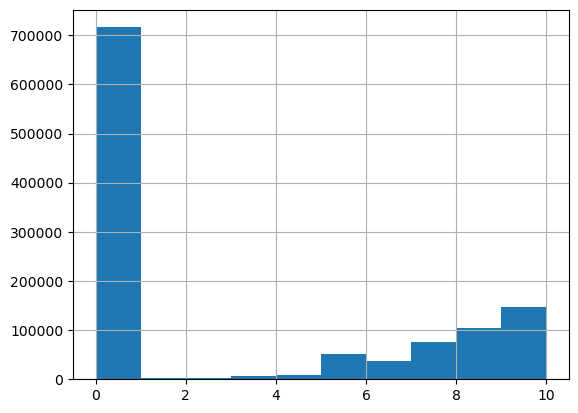

In [63]:
df.rating.hist()

In [64]:
def func(x): return "like" if x >= 7 else "dislike"
df.rating = df.rating.apply(func)
df.rating.head()

0    dislike
1    dislike
2    dislike
3    dislike
4    dislike
Name: rating, dtype: object

In [65]:
df.rating.value_counts()

dislike    823436
like       326344
Name: rating, dtype: int64

In [66]:
df.rename(columns={'rating':'relationship'}, inplace=True)
df.head()

,user_id,book_id,relationship
0,276725,034545104X,dislike
1,276726,0155061224,dislike
2,276727,0446520802,dislike
3,276729,052165615X,dislike
4,276729,0521795028,dislike


In [68]:
df.to_csv("relationships.csv",index=False)

# Sizing CSVs

### sizing ratings

Vou levar em consideração apenas ratings de leitores brasileiros já que esse foi o corte utilizado em users

In [99]:
df = pd.read_csv("relationships.csv")
df.head()

,user_id,book_id,relationship
0,276725,034545104X,dislike
1,276726,0155061224,dislike
2,276727,0446520802,dislike
3,276729,052165615X,dislike
4,276729,0521795028,dislike


In [101]:
brazilians = list(pd.read_csv("users.csv")['id'].unique())

In [104]:
df.loc[df.user_id.isin(brazilians)].to_csv("relationships.csv",index=False)

## sizing books

Por sua vez só vou considerar livros que foram avalidos por brasileiros

In [105]:
df = pd.read_csv("books.csv")
df.head()

,id,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1990,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1990,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1990,W W Norton &amp Company


In [106]:
books = list(pd.read_csv("relationships.csv")['book_id'].unique())

In [108]:
df.loc[df.id.isin(books)].to_csv("books.csv",index=False)